In [0]:
path='drive/My Drive/hackathon/'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

data_train=pd.read_excel(path+'Train_dataset.xlsx',header=0,names=np.arange(28))
data_train=data_train.drop(labels=[0,1,3,4],axis='columns')
data_train.columns=np.arange(24)

cols=data_train.columns
cols_num=data_train._get_numeric_data().columns
cols_cat=list(set(cols)-set(cols_num))
cols_num=list(set(cols)-set(cols_cat))
cols_num=cols_num[:-1]
cols=list(cols)

X_train=data_train.iloc[:,:-1].values
y_train=data_train.iloc[:,-1].values.reshape(-1,1)

# from sklearn.compose import ColumnTransformer
# import category_encoders as ce
# be=ce.BinaryEncoder()


imputer_cat=SimpleImputer(strategy="most_frequent")
X_train[:,cols_cat]=imputer_cat.fit_transform(X_train[:,cols_cat])

imputer_num=SimpleImputer(strategy="mean")

X_train[:,cols_num]=imputer_num.fit_transform(X_train[:,cols_num])

ct=ColumnTransformer([('encoder',OneHotEncoder(),cols_cat)],remainder='passthrough')
X_train=ct.fit_transform(X_train)

X_train=X_train.astype(float)
sc=StandardScaler();
X_train=sc.fit_transform(X_train)

In [0]:
model1=xgb.XGBRegressor()
# print(np.mean(cross_val_score(model1,X_train,y_train,scoring=make_scorer(mean_squared_error,greater_is_better=False))))
model1.fit(X_train,y_train)

[11:20:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor()
# print(np.mean(cross_val_score(model2,X_train,y_train,scoring=make_scorer(mean_squared_error,greater_is_better=False))))
model2.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
model3=GradientBoostingRegressor()
# print(np.mean(cross_val_score(model3,X_train,y_train,scoring=make_scorer(mean_squared_error,greater_is_better=False))))
model3.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
def mainModel(X):
  return ((model1.predict(X).reshape(-1,1)+model2.predict(X).reshape(-1,1)+model3.predict(X).reshape(-1,1)))/3

In [0]:
print(np.sqrt(mean_squared_error(y_train,mainModel(X_train))))

6.476511307598482


In [0]:
data_test=pd.read_excel(path+'Test_dataset.xlsx',header=0,names=np.arange(27))
data_test=data_test.drop(labels=[0,1,3,4],axis='columns')
data_test.columns=np.arange(23)
X_test=data_test.iloc[:,:].values
X_test[:,cols_cat]=imputer_cat.transform(X_test[:,cols_cat])
X_test[:,cols_num]=imputer_num.transform(X_test[:,cols_num])
X_test=ct.transform(X_test)
X_test=sc.transform(X_test)

In [0]:
y_pred=mainModel(X_test)
np.savetxt('ans.csv',y_pred,fmt='%f')

In [0]:
## Time series Analysis
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

data_train=pd.read_excel(path+'Train_dataset.xlsx',sheet_name=1)

sc=MinMaxScaler()

X_train=data_train.iloc[:,1:6].values
y_train=data_train.iloc[:,6].values.reshape(-1,1)

#X_train=sc.fit_transform(X_train)

X_test=data_train.iloc[:,2:7].values
y_test=data_train.iloc[:,7].values.reshape(-1,1)

#X_test=sc.transform(X_test)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test=  np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

model=Sequential()
model.add(LSTM(units=100,return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [0]:
model.fit(X_train,y_train,batch_size=10,epochs=100)
y_pred=model.predict(X_test)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





10714/10714 [==============================] - 53s 5ms/step - loss: 650108.0778
Epoch 2/100
10714/10714 [==============================] - 44s 4ms/step - loss: 571391.7481
Epoch 3/100
10714/10714 [==============================] - 41s 4ms/step - loss: 500813.3215
Epoch 4/100
10714/10714 [==============================] - 41s 4ms/step - loss: 436923.2638
Epoch 5/100
10714/10714 [==============================] - 42s 4ms/step - loss: 377810.8073
Epoch 6/100
10714/10714 [==============================] - 41s 4ms/step - loss: 325190.8841
Epoch 7/100
10714/10714 [==============================] - 42s 4ms/step - loss: 277453.5918
Epoch 8/100
10714/10714 [==============================] - 41s 4ms/step - loss: 235404.7066
Epoch 9/100
10714/10714 [==============================] - 41s 4ms/step - loss: 198123.2578
Epoch 10/100
10714/10714 [==============================] - 41s 4ms/st

In [29]:
data_test2=pd.read_excel(path+'Train_dataset.xlsx',header=0,names=np.arange(28))
data_test2=data_test2.drop(labels=[0,1,3,4],axis='columns')
data_test2.columns=np.arange(24)
X_test2=data_test2.iloc[:,:].values
X_test2[:,cols_cat]=imputer_cat.transform(X_test2[:,cols_cat])
X_test2[:,cols_num]=imputer_num.transform(X_test2[:,cols_num])
X_test2=ct.transform(X_test2)
X_test2=sc.transform(X_test2)

/usr/local/lib/python3.6/dist-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


In [0]:
y_pred2=mainModel(X_test2)
np.savetxt('ans2.csv',y_pred2,fmt='%f')

Hyper-parameter Tuning and data visualization

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
param_grid={'max_depth':[4,5,8,9],'min_child_weight':list(np.random.uniform(0,4,4)),'lambda':list(np.random.uniform(0,10,4)),'alpha':list(np.random.uniform(0,10,4))}
grid_search=GridSearchCV(xgb.XGBRegressor(),param_grid,scoring=make_scorer(mean_squared_error,greater_is_better=False))
grid_search.fit(X_train,y_train)                                                                                                          

In [0]:
print(grid_search.best_estimator_)
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.scorer_)

In [0]:
from sklearn.model_selection import cross_val_score
print(np.mean(cross_val_score(grid_search.best_estimator_,X_train,y_train,scoring=make_scorer(mean_squared_error,greater_is_better=False))))
print(np.mean(cross_val_score(xgb.XGBRegressor(),X_train,y_train,scoring=make_scorer(mean_squared_error,greater_is_better=False))))


In [33]:
print(np.sum(y_pred2>=60))

1284


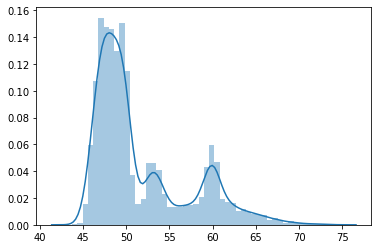

In [31]:
import seaborn as sns
sns.distplot(y_pred2)

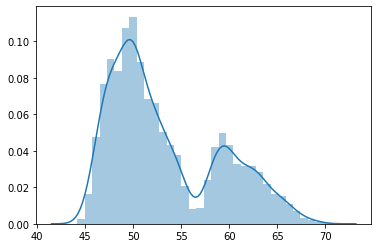

In [0]:
sns.distplot(y_pred)

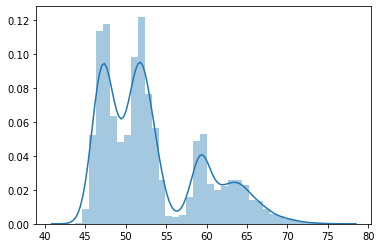

In [0]:
sns.distplot(y_pred1)

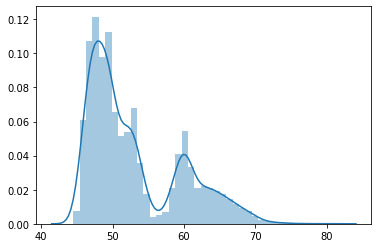

In [0]:
sns.distplot(y_pred2)

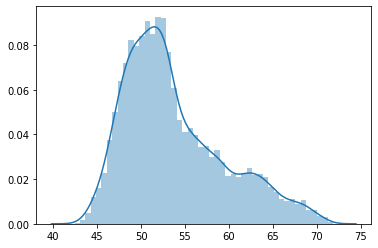

In [0]:
sns.distplot(y_pred3)

part 2

In [0]:
from google.colab import drive
drive.mount('/content/drive')